# Classification of 20 Newsgroups using ULMFit

## ULMFit Model Architecture

![image.png](attachment:image.png)

## Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 20_Newsgroups_All.txt to 20_Newsgroups_All.txt


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split

In [0]:
data = pd.read_csv('./20_Newsgroups_All.txt', sep='\t', header=0, encoding='utf-8')

In [4]:
data.head(5)

,Label,Term
0,alt.atheism,alt atheism faq atheist resources archive name...
1,alt.atheism,alt atheism faq introduction atheism archive n...
2,alt.atheism,gospel dating article mimsy umd edu mangoe umd...
3,alt.atheism,university violating separation church state d...
4,alt.atheism,soc motss princeton axes matching funds for bo...


In [5]:
data['Label'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [0]:
main_categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc']

### Splitting data into labels and features

Labels are the data which we want to predict and features are the data which are used to predict labels.

In [0]:
# delete duplicate verbatim
data.drop_duplicates(keep=False,inplace=True)

In [0]:
y = data['Label']
X = data['Term']

Splitting the data into train and test data, we will do that using train_test_split() function.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
X_train.head(5)

11425    some thoughts christian books think took this ...
9886     the real reason politicians want guns confisca...
11308    what shit shoveler was amusing atheists and ar...
14236    car alarms which one before get into another d...
12577    hint vlb isa eisa motherboard article news ias...
Name: Term, dtype: object

In [0]:
df_train = pd.DataFrame(y_train).join(pd.DataFrame(X_train))

In [0]:
df_valid = pd.DataFrame(y_test).join(pd.DataFrame(X_test))

Save train and validation dataset to CSV files respectively

In [13]:
df_train.head(5)

,Label,Term
11425,alt.atheism,some thoughts christian books think took this ...
9886,talk.politics.guns,the real reason politicians want guns confisca...
11308,alt.atheism,what shit shoveler was amusing atheists and ar...
14236,rec.autos,car alarms which one before get into another d...
12577,comp.sys.ibm.pc.hardware,hint vlb isa eisa motherboard article news ias...


In [0]:
df_train.to_csv('./train.csv', index=False, header=True)
df_valid.to_csv('./valid.csv', index=False, header=True)

Read training dataset

In [0]:
df = pd.read_csv('./train.csv', header=0, encoding='utf-8')

In [16]:
df_stats = df.groupby(['Label']).count()
df_stats.columns = ['Count']
df_stats

,Count
Label,
alt.atheism,584
comp.graphics,703
comp.os.ms-windows.misc,663
comp.sys.ibm.pc.hardware,667
comp.sys.mac.hardware,647
comp.windows.x,690
misc.forsale,657
rec.autos,703
rec.motorcycles,684


In [17]:
main_categories.sort()
main_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
df_stats['Label'] = main_categories
df_stats

,Count,Label
Label,,
alt.atheism,584,alt.atheism
comp.graphics,703,comp.graphics
comp.os.ms-windows.misc,663,comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware,667,comp.sys.ibm.pc.hardware
comp.sys.mac.hardware,647,comp.sys.mac.hardware
comp.windows.x,690,comp.windows.x
misc.forsale,657,misc.forsale
rec.autos,703,rec.autos
rec.motorcycles,684,rec.motorcycles


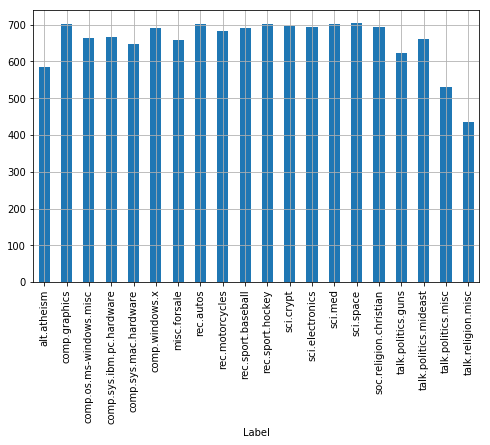

In [20]:
df_stats.plot(x = 'Label', 
              y = 'Count', 
              kind = 'bar', 
              legend = False, 
              grid = True, 
              figsize = (8,5))

### Pretrained language models

ULMFit uses its own pretrained language model wikitext-103 that can be conveniently downloaded from the fastai database hosted on AWS.

### Preprocess training data

In [21]:
# Check that the latest 1.0.0 build of PyTorch has been installed 
# alongside fastai
import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

Cuda available
PyTorch version:  1.1.0


In [0]:
# Write train to csv
#df.to_csv('./dataset/train.csv', index=False, encoding='utf-8', header=False)

## Transfer Learning Stages

This notebook utilizes the refactored and updated version (v1) of ULMFit as implemented in the fastai GitHub repository. This requires an install of Pytorch 1.0.0 (released on December 7, 2018) to run since its development intended to move alongside PyTorch's own development cycle in the future. It is recommended to run this entire notebook in a virtual environment to avoid clashes with pre-existing installs of PyTorch.

The refactored code for ULMFit is much more high-level and abstracted than the original version that was used in the paper, so it doesn't make sense to rewrite the data manipulation code for text handling and tokenization from the ground up. We can take advantage of the powerful transfer learning functionality that is baked into ULMFit (obtained after months of fine-tuning and refactoring the source code by Fast.ai) instead!

### Step1: Preprocess data for language model fine-tuning

The TextLMDataBunch [source] class returns a "Databunch" type of object that is a custom object defined in fastai.text's API. Note that according to this class definition, a significant amount of data pre-processing is going on under the hood.
* Initialize the language model with the pre-trained vocabulary's weights
* Create a custom data loader that "batchifies" the target task's vocabulary, i.e. split it up into batches for processing on the GPU
* Introduce randomness into the batches, but without breaking up the sentence sequences using techniques borrowed from language modeling.
* Tokenize the target task's vocabulary and increase the efficiency of tokenization (for large tasks) using multi-threading


In [0]:
from fastai import *
from fastai.text import *
path = './'

Creating a dataset from your raw texts is very simple. The library provides very easy to use API’s, depending on how our data is structured, to create a data class TextDataBunch for text processing, from_csv, from_folder,from_df refer to documentation for more details. Here we’ll use the method from_df of the TextLMDataBunch to create a language model specific data bunch:

In [0]:
data_lm = TextLMDataBunch.from_df(path, train_df=df_train, valid_df=df_valid, bs=32)

In [0]:
# Language model data
#data_lm = TextLMDataBunch.from_df('./dataset', train_df=df_train, valid_df=df_valid)

In [0]:
# Language model data
# data_lm = (TextLMDataBunch.from_csv(path, 'train.csv')
#           .split_by_rand_pct(0.3)
#           .label_for_lm()
#           .databunch(bs=5))

# Save the language and classifier model data for re-use
#data_lm.save('tmp_lm')

In [0]:
# data_lm = TextLMDataBunch.from_csv(path, 'train.csv', min_freq=1)

Note that in this case, we specify a minimum word frequency of 1 (i.e. words that appear just once in the data are given the tag <unk> during tokenization.

In [0]:
# data_lm = load_data(path='./dataset', file='tmp_lm', bs=5)

In [25]:
data_lm.show_batch()

idx,text
0,vanity press would recomend anyone out there visit your local christian bookstore and become aware the stuff they sell quite interesting most the stuff far from xxunk about the level chick xxunk common fundie bookstore should have least one section about how you should hate xxunk pagans catholics mormons rock musicians and anyone else who not fanatical them hate for the love god even more interesting watching the people who
1,christians answering polemic from his enemies mark account casts the answer far more positive light the scribe this version says far more important than any holocaust need point out that this word originates the context animal sacrifice forget the nazis for this sacrifice luke intermediate has lawyer posing the question disconcert jesus and gets the good xxunk parable for his pains luke the contexts here are xxunk various that one
2,systems for the card plus per can vouch for this one ordered and got for including took awhile figure out how get working with system but since did get terrific results while downloading using pcplus for windows used get errors started any other program while downloading high speed not anymore more text deleted tom huot huot cray com xxbos uart needed really break detect article alan alan apple com alan
3,your inspector about your specific situation hint buy roll bright yellow tape that says buried power line and bury few inches above where the wire has been placed subject aluminum wiring during the aluminum instead copper wiring became quite popular and was extensively used since that time aluminum wiring has been implicated number house fires and most jurisdictions longer permit new installations recommend even you allowed that not use for
4,rookie the time and his birthday too but all the blame lies with him starting pee wee coaches tell players never make cross ice pass front their own net too much chance having intercepted hitting the goaltender whatever and the people who say that smith cost the oilers the series can only say that certainly didn cause the team lose the other three games there was reason for powerhouse team


In [0]:
# Save the language and classifier model data for re-use
data_lm.save('tmp_lm')

# Classifier model data
#data_clas = TextClasDataBunch.from_df('./dataset', train_df=df_train, valid_df=df_valid, vocab=data_lm.train_ds.vocab, bs=5)

In [0]:
#data_clas.save('data_clas')

In [0]:
# Reload LM and clas data from file if doing so for large cases
# data_lm = TextLMDataBunch.load(path)
# data_clas = TextClasDataBunch.load(path, bs=5)

### Step 2: Create Language Model

![image.png](attachment:image.png)

We only need to run the above tokenization step once, and save the data. All the data goes to a local folder named tmp/. For a large added vocabulary, the above tokenization step can take a while, hence we save them and restart the notebook from the next cell (if we close our session).

The tokenization technique used by fastai.text is quite advanced, and uses quite a few tricks to capture semantic meaning from the text. Unlike typical NLTK-type tokenization, here we are not converting the Verbatim to lowercase and removing information from the base text - that would result in a tremendous loss of information that our model could use to gather an understanding of our new task's vocabulary.

Instead, a number of added tokens are applied so that minimal information is lost. A full list of all the tokenization rules used are [here](https://docs.fast.ai/text.transform.html#Rules).

As an example, the xxmaj token [source](https://github.com/fastai/fastai/blob/1c5c007e10a187f4a048a3ee8137016534259768/fastai/text/transform.py#L71) indicates that there is capitalization of the word, either in part or in full. "The" will be tokenized as "xxmaj the". For words that are full capitalized, such as "I AM SHOUTING"; it is tokenized as "xxup i xxup am xxup shouting". The tokenizer uses spaCy's underlying tokens, but adds tags in a very smart way that balances capturing semantic meaning while reducing the number of overall tokens, so it is both powerful and efficient.

The tokenization process described above is highly efficient, in part thanks to the power of SpaCy and also due to the multi-threading wrappers implemented by Fast.ai on top of Spacy's tokenizer. As a result, a really large language model's vocabulary (of millions of words) can also be effectively tokenized in a reasonable time.


### Define learner object for language model finetuning

We define a learner object that uses the tokenized language model data, that is organized into batches for the GPU, and feed it a pre-trained language model.

This is the first stage of training, where we use the pre-trained language model weights and fine-tune it with the training data of IMDb movie reviews. When we create a learner, we have to pass in two things:

* The data: our language model data (data_lm)
* A pre-trained model: here, the pre-trained model is the Wikitext 103 model that will be downloaded for you from fastai.
    
We use the wt_103_v1 model that was refined after re-training using the more efficient fastai v1 library. The data (lstm_wt103.pth) is downloaded through an AWS-hosted link (accessed through the fastai.datasets interface), and stored locally. All the data in the language model file is numericalized and stored in a way that the learner can efficiently pick up tokens in float form. In addition to the language model, there is also an additional pickle object itos_wt103.pkl that is similar to the torchtext definition of "integer-to-string" - this contains the list of unique tokens in word form, so that we can map the tokens back to strings if necessary.

In [0]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

drop_mult , a hyper-parameter ,used for regularization, sets the amount of dropout. If the model is over-fitting increase it, if under-fitting, you can decrease the number.

### Print the structure of the language model RNN

We can examine the architecture of the 3-layer LSTM used in ULMFit as shown below. For the language model fine-tuning, we define the embeddings based on the the target task vocabulary size. A single linear output layer is defined that updates the weights once we pass the input through the network.

In [0]:
list(learn.model.children())

[AWD_LSTM(
   (encoder): Embedding(3272, 400, padding_idx=1)
   (encoder_dp): EmbeddingDropout(
     (emb): Embedding(3272, 400, padding_idx=1)
   )
   (rnns): ModuleList(
     (0): WeightDropout(
       (module): LSTM(400, 1152, batch_first=True)
     )
     (1): WeightDropout(
       (module): LSTM(1152, 1152, batch_first=True)
     )
     (2): WeightDropout(
       (module): LSTM(1152, 400, batch_first=True)
     )
   )
   (input_dp): RNNDropout()
   (hidden_dps): ModuleList(
     (0): RNNDropout()
     (1): RNNDropout()
     (2): RNNDropout()
   )
 ), LinearDecoder(
   (decoder): Linear(in_features=400, out_features=3272, bias=True)
   (output_dp): RNNDropout()
 )]

### Find the optimum learning rate

fastai.train [source](https://github.com/fastai/fastai/blob/050080be574cb1260462bbd03e9600e43e7a54b1/fastai/train.py#L23) provides a convenient utility to search through a range of learning rates to find the optimum one for our dataset.

The idea is that our optimization function needs to use a learning rate that is an order of magnitude below the point at which the loss starts to diverge. We can quickly find this as shown below.

**How to fine-tune the pre-trained model on our movie review data?** <br>
Learning rate hyper-parameter is one of the most important parameters to train a model. Fast.ai provides a convenient utility (learn.lr_find) to search through a range of learning rates to find the optimum one for our dataset. Learning rate finder will increase the learning rate after each mini-batch. Eventually, the learning rate is too high that loss will get worse. 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


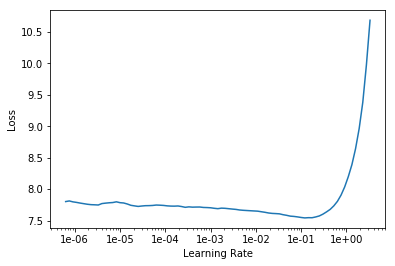

In [28]:
learn.lr_find()
learn.recorder.plot()

In [0]:
# free CUDA cache
#torch.cuda.empty_cache()

### Training the model:

We start training the model with learning rate 1e-2 using fit_one_cycle.

In [29]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.167998,5.899877,0.161412,04:11


fast.ai library uses latest techniques from deep learning research and one cycle learning is from one of the recent paper and turned out to be both more accurate and faster than any previous approach. First argument ‘1’ is number of epoch runs . We get an accuracy of 29.6% after running just one epoch.

It trained last layers and basically left most of the model exactly as it was. But what we really want is to train the whole model. Normally after we fine-tune the last layers, the next thing we do is we go unfreeze (unfreeze the whole model for training) and train the whole thing.

In [30]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.893032,5.707376,0.180885,04:59


Accuracy = 0.3 means the model is guessing the next word of the verbatim correctly about a third of the time. That sounds like a pretty high number. So it’s a good sign that my language model is doing pretty well.

### Predicting with Language Model

To evaluate our language model, we can now run learn.predict and pass in the start of a sentence and specify the number of words we want it to guess.

In [31]:
learn.predict('happy birthday israel hamid mcrcim mcgill edu hamid reza mohammadi daniali writes', n_words=50)

'happy birthday israel hamid mcrcim mcgill edu hamid reza mohammadi daniali writes aldus refugees etc could someone please tell how can buy winqvt file thanks jay priori savings call its breed hand off there are young people fled from west west lebanon from bosnia also all authorities wrote the other thing and called horsefeathers even feeding one side question think who ezek'

Actual comments from our customer. Pikced up from slack channel 
```
Why did you change the fuel import process? I use YOUR template, but now I have to change 81 rows because it doesn't import correctly.
```
![image.png](attachment:image.png)

In [0]:
learn.save_encoder('fine_enc')

### Creating the classifier

Now we’re ready to create our classifier. Step one, is to create a data bunch, TextClasDataBunch, passing the vocab from the language model to make sure that this data bunch is going to have exactly the same vocab. Batch size bs to be used is according to the GPU memory you have available, for a 2GB GPU around bs=5 will work fine. You can find whatever batch size fits on your card and use it accordingly.

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_df('./'
                                      ,train_df=df_train
                                      ,valid_df=df_valid
                                      ,vocab=data_lm.train_ds.vocab
                                      ,bs=32)

In [34]:
data_clas.show_batch()

text,target
xxbos electrical wiring faq was question about vac outlet wiring since electrical wiring questions turn from time time sci electronics and the answers aren always apparent even those skilled electronics xxunk the following faq and posting copy here asked the writers cross post sci electronics the future jeh cmkrnl com news cmkrnl news answers newsgroups misc consumers house rec woodworking news answers misc answers rec answers subject electrical wiring faq,sci.electronics
xxbos accounts anti armenian human right violations azerbaijan accounts anti armenian human right violations azerbaijan part prelude current events nagorno karabakh part yes just remembered while they were raping they repeated quite frequently let the armenian women have babies for muslim babies let them bear azerbaijanis for the struggle against the armenians then they said those muslims can carry our holy cause heroes they repeated very often continued from part,talk.politics.mideast
xxbos accounts anti armenian human rights violations azerbaijan accounts anti armenian human rights violations azerbaijan prelude current events nagorno karabakh they grab papa carry him into one room and mamma and into another they put mamma the bed and start undressing her beating her legs they start tearing clothes right there front mamma don remember where they went what they did how much time passed had the feeling that they,talk.politics.mideast
xxbos jpeg image compression frequently asked questions archive name jpeg faq last modified may this faq article discusses jpeg image compression suggestions for additions and clarifications are welcome new since version april new version supports bit viewing for windows new versions dvpeg image alchemy for dos new versions image archiver pmview for new listing mgif for monochrome display ataris this article includes the following sections what jpeg why use jpeg,comp.graphics
xxbos open look gui frequently asked questions frequently asked questions about the open look graphical user interface your question isn here please try least man openwin man xnews man xview and looking the appropriate manuals listed the bibliography below before posting the comp windows open look comp windows alt toolkits xview newsgroups and their corresponding mailing lists special notes have not updated this faq for the recently announced openwindows due,comp.windows.x


Finally we will create a text classifier learner. Load in our pre train model, the encoding part we saved earlier ‘fine_enc’.

In [0]:
# Classifier
classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
classifier.load_encoder('fine_enc')

Again, we follow the same procedure to find the learning rate and train the model.

In [36]:
classifier.lr_find(start_lr=1e-06, end_lr=1e00,)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


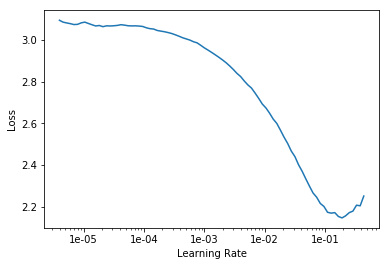

In [37]:
classifier.recorder.plot()

In [38]:
classifier.fit_one_cycle(1, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.705377,0.578994,0.800675,01:33


Loss Plot: Let us plot the loss while training the model:

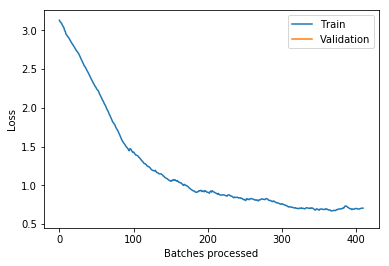

In [39]:
classifier.recorder.plot_losses()

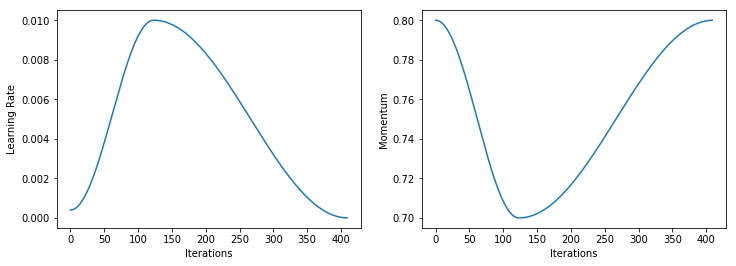

In [40]:
classifier.recorder.plot_lr(show_moms=True)

In [0]:
classifier.save('first')

In [42]:
classifier.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (13132 items)
x: TextList
xxbos some thoughts christian books think took this liar lunatic the real thing the last time was the time before anyway let somebody else have turn can debate with straight face perhaps for something completely different could just ridicule him gather all the posts from the last two times did this and email them him aside can you believe that somebody actually got book published about this must have been vanity press would recomend anyone out there visit your local christian bookstore and become aware the stuff they sell quite interesting most the stuff far from xxunk about the level chick xxunk common fundie bookstore should have least one section about how you should hate xxunk pagans catholics mormons rock musicians and anyone else who not fanatical them hate for the love god even more interesting watching the people who frequent such places very scary people they hear voices from god telling them whatev

### Fine-Tune further

To improve the accuracy further, fast.ai provides some more tricks;freeze_to. Don't unfreeze the whole thing but to unfreeze one layer at a time. The below approach works very well and gives incredible results.

* unfreeze the last two layers freeze_to(-2), train it a little bit more
* unfreeze the next layer freeze_to(-3), train it a little bit more
* unfreeze the whole thing unfreeze(), train it a little bit more

In [43]:
classifier.freeze_to(-2)
classifier.fit_one_cycle(1, slice(1e-03,1e-02), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.538493,0.466809,0.851661,02:00


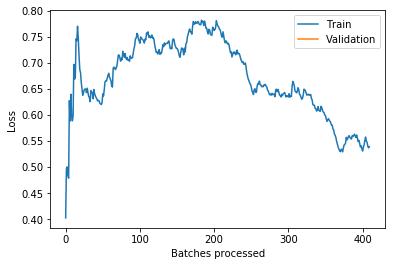

In [44]:
classifier.recorder.plot_losses()

In [0]:
classifier.save('second')

In [46]:
classifier.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (13132 items)
x: TextList
xxbos some thoughts christian books think took this liar lunatic the real thing the last time was the time before anyway let somebody else have turn can debate with straight face perhaps for something completely different could just ridicule him gather all the posts from the last two times did this and email them him aside can you believe that somebody actually got book published about this must have been vanity press would recomend anyone out there visit your local christian bookstore and become aware the stuff they sell quite interesting most the stuff far from xxunk about the level chick xxunk common fundie bookstore should have least one section about how you should hate xxunk pagans catholics mormons rock musicians and anyone else who not fanatical them hate for the love god even more interesting watching the people who frequent such places very scary people they hear voices from god telling them whatev

In [47]:
#classifier.freeze_to(-3)
classifier.fit_one_cycle(1, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.423506,0.438577,0.860899,01:53


In [0]:
classifier.save('third')

In [0]:
classifier.load('third');

In [50]:
classifier.unfreeze()
classifier.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.345784,0.426443,0.861254,03:13
1,0.306925,0.402174,0.875644,03:36
2,0.238287,0.387916,0.880085,03:29
3,0.202128,0.383166,0.879908,03:10
4,0.167049,0.387027,0.883105,03:49


In [0]:
classifier.save('final')

In [52]:
classifier.show_results()

text,target,prediction
xxbos rec sport hockey frequently asked questions archive name hockey faq rec sport hockey answers frequently asked questions and other news contents new info nhl nhl minor leagues college hockey north america other leagues europe canada cup tournament mail files usenet hockey pool coming dates answers some frequently asked questions miscellaneous send comments suggestions and criticisms regarding this faq list via mail hamlet washington edu new info this section will,rec.sport.hockey,rec.sport.hockey
xxbos jpeg image compression frequently asked questions archive name jpeg faq last modified may this faq article discusses jpeg image compression suggestions for additions and clarifications are welcome new since version may added info xxunk for next this article includes the following sections what jpeg why use jpeg when should use jpeg and when should stick with gif how well does jpeg compress images what are good quality settings for,comp.graphics,comp.graphics
xxbos accounts anti armenian human right violations azerbaijan accounts anti armenian human right violations azerbaijan prelude current events nagorno karabakh they beat the husband dragged the wife outside and stood her naked next our burning things her husband was lying her feet the ground the crowd shouted look the naked armenian they were going throw the poor woman into the fire mamma wouldn allow but went the window and saw,talk.politics.mideast,talk.politics.mideast
xxbos comp windows intrinsics frequently asked questions faq archive name faq version faq ware exp the toolkit intrinsics monthly posting this article contains the answers some frequently asked questions faq from comp windows about the toolkit intrinsics submit questions preferably with answer send email ware cis ohio state edu many faqs including this one are available the archive site rtfm mit edu the directory pub usenet news answers the name,comp.windows.x,comp.windows.x
xxbos apr computer graphics resource listing weekly part archive name graphics resources list part last modified computer graphics resource listing weekly posting part last change april many faqs including this listing are available the archive site pit manager mit edu alias rtfm mit edu the directory pub usenet news answers the name under which faq archived appears the archive name line the top the article this faq archived graphics resources,comp.graphics,comp.graphics


In [0]:
from fastai.vision import *

In [0]:
interp = ClassificationInterpretation.from_learner(classifier)

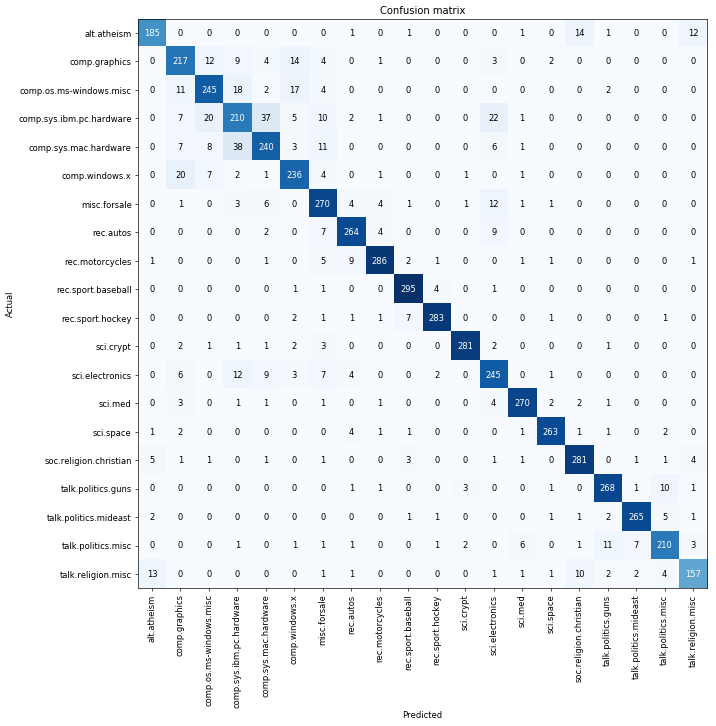

In [55]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
pred,y,losses = classifier.get_preds(with_loss=True)

In [0]:
interp = ClassificationInterpretation(classifier, pred, y, losses)

In [58]:
interp.most_confused()

[('comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 38),
 ('comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 37),
 ('comp.sys.ibm.pc.hardware', 'sci.electronics', 22),
 ('comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 20),
 ('comp.windows.x', 'comp.graphics', 20),
 ('comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 18),
 ('comp.os.ms-windows.misc', 'comp.windows.x', 17),
 ('alt.atheism', 'soc.religion.christian', 14),
 ('comp.graphics', 'comp.windows.x', 14),
 ('talk.religion.misc', 'alt.atheism', 13),
 ('alt.atheism', 'talk.religion.misc', 12),
 ('comp.graphics', 'comp.os.ms-windows.misc', 12),
 ('misc.forsale', 'sci.electronics', 12),
 ('sci.electronics', 'comp.sys.ibm.pc.hardware', 12),
 ('comp.os.ms-windows.misc', 'comp.graphics', 11),
 ('comp.sys.mac.hardware', 'misc.forsale', 11),
 ('talk.politics.misc', 'talk.politics.guns', 11),
 ('comp.sys.ibm.pc.hardware', 'misc.forsale', 10),
 ('talk.politics.guns', 'talk.politics.misc', 10),
 ('talk.religion.misc', 'soc.re